## Crime Analytics

## Communicating Data Science Results 
#### by University of Washington

The Visual crime analysis will analyze criminal incident data from Seattle and San Francisco for the period of June, July, and August 2014.

The analysis will try to answer, mainly visually, to the following questions:

##### How do incidents vary month to month in the Summer 2014 dataset?
##### How do incidents vary by time of day? 
##### Which incidents are most common in the evening? 
##### During what periods of the day are robberies most common?
##### What can we infer broadly about the differences in crime patterns between Seattle and San Francisco? 
##### Does one city tend to have more crime than the other, per capita? 
##### Do certain crimes correlate with environmental factors such as temperature? 


### Data collection and cleaning
These reduced datasets are available on the [course github repository](https://github.com/uwescience/datasci_course_materials/tree/master/assignment6)
##### Seattle Data :
[Seattle Summer 2014 dataset](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/seattle_incidents_summer_2014.csv)
##### San Francisco Data :
[San Francisco Summer 2014 dataset](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/sanfrancisco_incidents_summer_2014.csv)

All datasets are provided through their respective cities data portals, all powered by [Socrata](https://www.socrata.com/). The three portals and the links to the original datasets are

In particular, to answer to some of this questions, some external data are required, namely: temperature for summer 2014 and population for both cities.

The temperature for Seattle data are collected from:
###### [National Weather Service](http://w2.weather.gov/climate/index.php?wfo=sew) , 
while the temperature data for San Francisco are collected from:
###### [US Climate Data](http://www.usclimatedata.com/climate/san-francisco/california/united-states/usca0987/2014/8) , 
setting the month as the last character into the link provided.

The files are loaded and the temperatures are normalized for both, computing the average temperature for Seattle from the min and max values, and then using the average daily temperature for each month to fill some empty values.
In addition to keep both dataset comparables, a normalization is performed in the Category or Summarized.Offense.Description that ar eplanned to be used for visualizatoin analytics.

###### How Category normalizatoin is performed
In the original datasets, a number of category classification were not overlapping, and in addition San Francisco had fewer categories then Seattle. The strategy adopted had been to start from the fewer categories of San Francisco and attach every category from Seattle to one of them. This left the set of San Francisco with some more categories in respect to Seattle, so a second step of normalizatoin on San Francisco categories  is performed, until both set have exactly the same categories.

The logic adopted to link categories  with different name, in some cases lie on personal interpretation as this is inavoidable, if we don't imagine a complex Natural Language Processing step that is not the target for this work.
Therefore some categories unclassified in the other dataset, are linked to the most general category where needed, e.g. "OTHER OFFENSES", already present in the San Francisco records, while the common sense was used in case of simpler interpretations.




In [101]:
Sys.setlocale("LC_TIME", "English")
options(jupyter.plot_mimetypes = 'image/png')
#setwd("E:/MEGA/Git Repository/datasci_course_materials/assignment6")        
crisan  <- read.csv("sanfrancisco_incidents_summer_2014.csv", header = T)     
crisea  <- read.csv("seattle_incidents_summer_2014.csv", header = T)   
tempsan <- read.csv("SeattleTemp.csv", header = T, sep=";")     
tempsea <- read.csv("SanFranciscoTemp.csv", header = T, sep=";")   
tempsea$TempAvg <- round((tempsea$TempMin+tempsea$TempMax)/2,0)

# mean temp of June
meanJune <- round(mean(tempsea[substr(tempsea$Date,1,2)=="06"&tempsea$TempAvg!=0,]$TempAvg),0)
# Update June when temp = 0
tempsea[substr(tempsea$Date,1,2)=="06"&tempsea$TempAvg==0,]$TempAvg <- meanJune

# mean temp of July
meanJuly <- round(mean(tempsea[substr(tempsea$Date,1,2)=="07"&tempsea$TempAvg!=0,]$TempAvg),0)
# Update July when temp = 0
tempsea[substr(tempsea$Date,1,2)=="07"&tempsea$TempAvg==0,]$TempAvg <- meanJuly

# mean temp of Agust
meanAgust <- round(mean(tempsea[substr(tempsea$Date,1,2)=="08"&tempsea$TempAvg!=0,]$TempAvg),0)
# Update Agust when temp = 0
tempsea[substr(tempsea$Date,1,2)=="08"&tempsea$TempAvg==0,]$TempAvg <- meanAgust

tempsea$TempMin <- NULL
tempsea$TempMax <- NULL
#str(crisan)
#str(crisea)
crisea$Date <- as.factor(substr(as.character(crisea$Occurred.Date.or.Date.Range.Start), 1, 10))
crisea$Time <- as.factor(substr(as.character(crisea$Occurred.Date.or.Date.Range.Start), 12, 16))
crisea <- merge(x = crisea, y = tempsea, by = "Date")
crisan <- merge(x = crisan, y = tempsan, by = "Date")
crisea$DayOfWeek <- weekdays(as.Date(crisea$Date,'%m/%d/%Y'))
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="INJURY"] <- "ASSAULT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="HOMICIDE"] <- "ASSAULT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="BURGLARY-SECURE PARKING-RES"] <- "BURGLARY"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="TRESPASS"] <- "BURGLARY"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PUBLIC NUISANCE"] <- "DISORDERLY CONDUCT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="THREATS"] <- "DISORDERLY CONDUCT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="DUI"] <- "DRIVING UNDER THE INFLUENCE"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="NARCOTICS"] <- "DRUG/NARCOTIC"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="TRAFFIC"] <- "DRUG/NARCOTIC"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="EMBEZZLE"] <- "EMBEZZLEMENT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="COUNTERFEIT"] <- "FORGERY/COUNTERFEITING"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="FORGERY"]   <- "FORGERY/COUNTERFEITING"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="MAIL THEFT"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PICKPOCKET"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PURSE SNATCH"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="SHOPLIFTING"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="STOLEN PROPERTY"] <- "LARCENY/THEFT"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="THEFT OF SERVICES"] <- "LARCENY/THEFT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="LIQUOR VIOLATION"] <- "LIQUOR LAWS"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="LOST PROPERTY"] <- "NON-CRIMINAL"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="RECOVERED PROPERTY"] <- "NON-CRIMINAL"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ANIMAL COMPLAINT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="BIAS INCIDENT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="CAR PROWL"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="DISPUTE"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="DISTURBANCE"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="FALSE REPORT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="FIREWORK"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="[INC - CASE DC USE ONLY]"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ILLEGAL DUMPING"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="OBSTRUCT"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="OTHER PROPERTY"] <- "OTHER OFFENSES"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="VIOLATION OF COURT ORDER"] <- "OTHER OFFENSES"


levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PORNOGRAPHY"] <- "PORNOGRAPHY/OBSCENE MAT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ELUDING"] <- "RUNAWAY"
levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="ESCAPE"] <- "RUNAWAY"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="PROPERTY DAMAGE"] <- "VANDALISM"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="BIKE THEFT"] <- "VEHICLE THEFT"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="WARRANT ARREST"] <- "WARRANTS"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="WEAPON"] <- "WEAPON LAWS"

levels(crisea$Summarized.Offense.Description)[levels(crisea$Summarized.Offense.Description)=="RECKLESS BURNING"] <- "ARSON"

levels(crisan$Category)[levels(crisan$Category)=="BRIBERY"] <- "EMBEZZLEMENT"
levels(crisan$Category)[levels(crisan$Category)=="EXTORTION"] <- "EMBEZZLEMENT"
levels(crisan$Category)[levels(crisan$Category)=="DRUNKENNESS"] <- "DISORDERLY CONDUCT"
levels(crisan$Category)[levels(crisan$Category)=="FAMILY OFFENSES"] <- "DISORDERLY CONDUCT"
levels(crisan$Category)[levels(crisan$Category)=="SUSPICIOUS OCC"] <- "DISORDERLY CONDUCT"
levels(crisan$Category)[levels(crisan$Category)=="KIDNAPPING"] <- "ASSAULT"
levels(crisan$Category)[levels(crisan$Category)=="GAMBLING"] <- "SECONDARY CODES"
levels(crisan$Category)[levels(crisan$Category)=="LOITERING"] <- "SECONDARY CODES"
levels(crisan$Category)[levels(crisan$Category)=="MISSING PERSON"] <- "SECONDARY CODES"
levels(crisan$Category)[levels(crisan$Category)=="SECONDARY CODES"] <- "OTHER OFFENSES"
levels(crisan$Category)[levels(crisan$Category)=="STOLEN PROPERTY"] <- "OTHER OFFENSES"
levels(crisan$Category)[levels(crisan$Category)=="SUICIDE"] <- "OTHER OFFENSES"
levels(crisan$Category)[levels(crisan$Category)=="TRESPASS"] <- "RUNAWAY"

#sort(levels(crisea$Summarized.Offense.Description)) == sort(levels(crisan$Category))


[1] "English_United States.1252"

##### Question n.1: How do incidents vary month to month in the Summer 2014 dataset?
We have two dimension here, one for the Month and one for the total incidents per Month, both mapped to space using the alignment of Y-axis in different position of space with the "Alignment" method on X-Axis.

In [102]:
# Normalizing months and number ov events
crisea$monthLabel <- months(as.Date(crisea$Date,'%m/%d/%Y'))
crisan$monthLabel <- months(as.Date(crisan$Date,'%m/%d/%Y'))
# count the timestamps per month for each year
library(plyr)
seaNEvents= count(crisea, vars = c("monthLabel"))
sanNEvents= count(crisan, vars = c("monthLabel"))


In [103]:
#Multiple plot function

#ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
#- cols:   Number of columns in layout
#- layout: A matrix specifying the layout. If present, 'cols' is ignored.

#If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
#then plot 1 will go in the upper left, 2 will go in the upper right, and
#3 will go all the way across the bottom.

multiplot <- function(..., plotlist=NULL, file, cols=1, rows=2, layout=NULL) {
  require(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


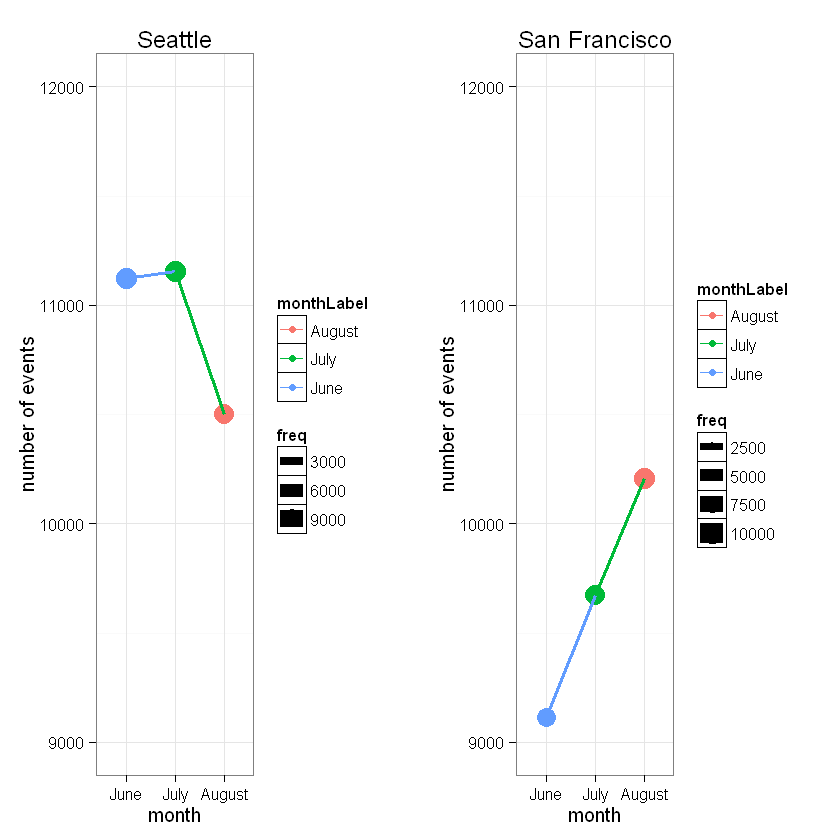

In [104]:
library(ggplot2)
p1 <- ggplot(seaNEvents, aes(x = factor(monthLabel, levels=c("June","July","August")), 
                       y = freq, 
                       fill = monthLabel, 
                       size = freq,  
                       ymin = 9000, 
                       ymax = 12000, 
                       colour = monthLabel )) +
  geom_point(stat="identity") +
  geom_line(aes(y= freq, colour = monthLabel, size = 1, group = 1)) + 
  labs(title = "Seattle") +
  labs(y = "number of events") +
  labs(x = "month") +
  theme_bw() +
  theme(legend.key = element_rect(colour = "black"))

p2 <- ggplot(sanNEvents, aes(x = factor(monthLabel, levels=c("June","July","August")), 
                       y = freq, 
                       fill = monthLabel, 
                       size = freq,  
                       ymin = 9000, 
                       ymax = 12000, 
                       colour = monthLabel )) +
  geom_point(stat="identity") +
  geom_line(aes(y= freq, colour = monthLabel, size = 1, group = 1)) + 
  labs(title = "San Francisco") +
  labs(y = "number of events") +
  labs(x = "month") +
  theme_bw() +
  theme(legend.key = element_rect(colour = "black"))
multiplot(p1,p2, cols=2)



From this first plot is evident a differenece in pattern for the two cities: while in Seattle the events are constant in June/July and decreases in August, in San Francisco they keep to increase. Also to be noted that anyway, the absolute number of incidents is always higher in Seattle.

##### How do incidents vary by time of day? 

##### During what periods of the day are robberies most common?
Again time is mapped in space on to X-axis, and the number of incidents on Y-axis. 
In addition to mapping in Space, the count of events is mapped in area, having bogger dots for more frequent hours with the "Alignment" method on X-axis.

In [227]:
crisea$Hour <- substr(crisea$Time,1,2)
crisan$Hour <- substr(crisan$Time,1,2)
library(plyr)
# Transform 12 to 24 hour in Seattle dataset
crisea$PM <- 0
crisea[substr(crisea$Occurred.Date.or.Date.Range.Start,21,22)=="PM",]$PM <- 12
crisea$Hour <- as.numeric(crisea$Hour)+crisea$PM
crisea$Hour <- as.character(crisea$Hour)
# Normalizing Hours from 01-24 to 00-23
crisea$Hour <- as.numeric(crisea$Hour)-1
crisea[nchar(crisea$Hour)==1,]$Hour <- paste0("0",crisea[nchar(crisea$Hour)==1,]$Hour)

crisearob <- crisea[crisea$Summarized.Offense.Description=="ROBBERY",]
crisanrob <- crisan[crisan$Category=="ROBBERY",]


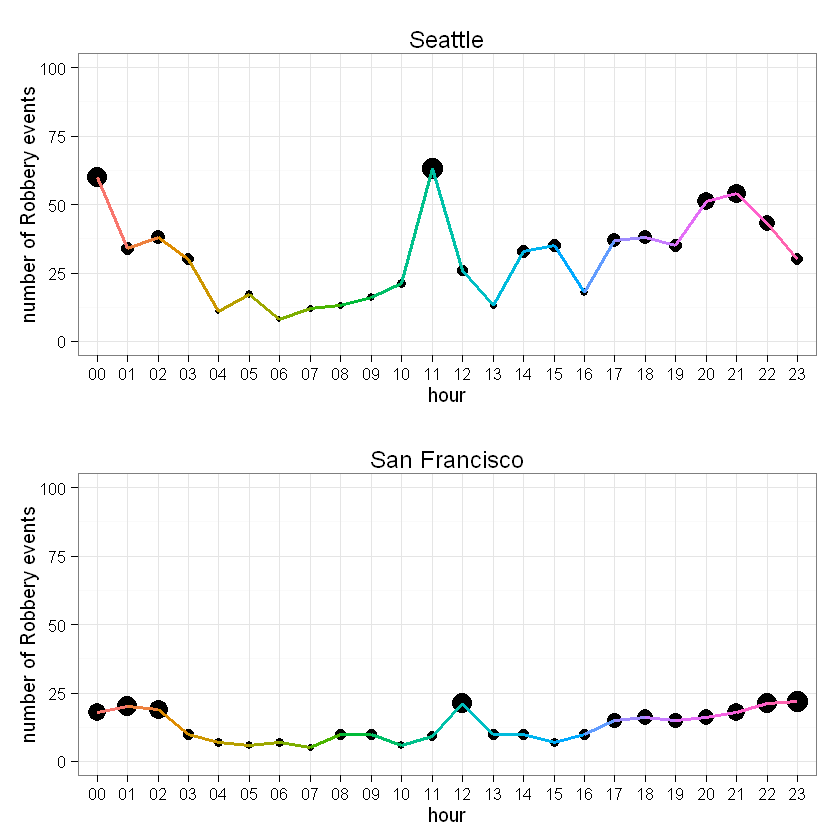

In [231]:

seaTimeCount= count(crisearob, vars = c("Hour"))
sanTimeCount= count(crisanrob, vars = c("Hour"))
library(ggplot2)
p1 <- ggplot(seaTimeCount, aes(x = factor(Hour), 
                       y = freq, 
                       fill = Hour, 
                       size = freq,  
                       ymin = 0, 
                       ymax = 100)) +
  geom_point(stat="identity" ) +
  geom_line(aes(y= freq, colour = Hour, size = 1, group = 1)) + 
  labs(title = "Seattle") +
  labs(y = "number of Robbery events") +
  labs(x = "hour") +
  theme_bw() +
  theme(legend.position = "none")  


p2 <- ggplot(sanTimeCount, aes(x = factor(Hour), 
                       y = freq, 
                       fill = Hour, 
                       size = freq,  
                       ymin = 0, 
                       ymax = 100)) +
  geom_point(stat="identity") +
  geom_line(aes(y= freq, colour = Hour, size = 1, group = 1)) + 
  labs(title = "San Francisco") +
  labs(y = "number of Robbery events") +
  labs(x = "hour") +
  theme_bw() +
  theme(legend.position = "none")  
  multiplot(p1,p2, cols=1)

It is immediately evident that for both cities, there is a pick of incidents around noon. The trend is different for Seattle and San Francisco, having Seattle a more costant trend  with a sligtly increment in the night, while san Francisco shows a higher variability, with some picks at midnight and around the 20:00 and 21:00.

In addition we easily can observe a difference from 22:00 to 23:00 where Seattle have an increase of incidents, while San Francisco a descrease.




#### Which incidents are most common in the evening ?

Only hours from 16:00 to 20:00 are considered: to keep the two datasets comparable, it seems reasonable to exclude the Category "Other Offenses" from the following plot. In fact, we have no guarranty that the categories converged in this category is in the same number and proportion for for the two datasets, and keeping that inside the analysis would lead to incorrect conclusion.

In [182]:
evensea <- crisea[which(crisea$Hour %in% c("16","17", "18", "19", "20") & crisea$Summarized.Offense.Description != c("OTHER OFFENSES")),]
evensan <- crisan[which(crisan$Hour %in% c("16","17", "18", "19", "20") & crisan$Category != "OTHER OFFENSES"),]
#evensea <- crisea[crisea$Hour %in% c("16","17", "18", "19", "20"),]
#evensan <- crisan[crisan$Hour %in% c("16","17", "18", "19", "20"),]


evenseaCount= count(evensea, vars = c("Summarized.Offense.Description"))
evensanCount= count(evensan, vars = c("Category"))

#evenseaCount$freq <- factor(evenseaCount$freq)
#evensanCount$freq <- factor(evensanCount$freq)
evenseaCount$Summarized.Offense.Description <- reorder(evenseaCount$Summarized.Offense.Description, evenseaCount$freq)
evensanCount$Category <- reorder(evensanCount$Category, evensanCount$freq)


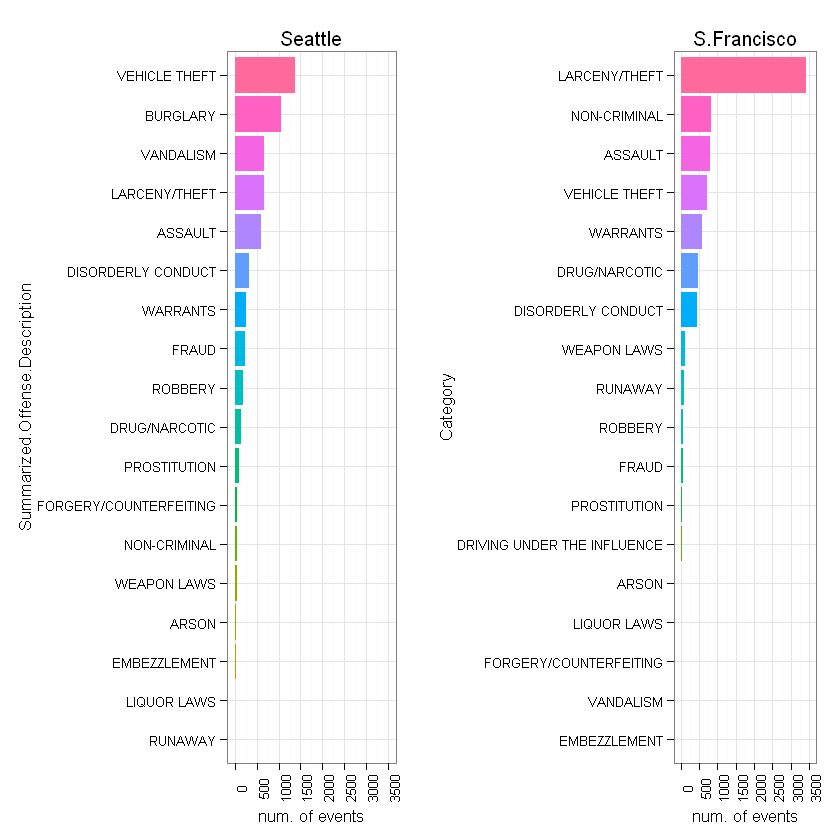

In [194]:
##### Which incidents are most common in the evening? 

# Reorder levels of factor to get a oreder barplot:

library(ggplot2)
evenseaCount$freq <- as.numeric(evenseaCount$freq)
p1 <- ggplot(evenseaCount, aes(x = Summarized.Offense.Description, 
                       y    = freq, 
                       fill = Summarized.Offense.Description, 
                       size = 5,  
                       ymin = 1000, 
                       ymax = 5000)) +
  geom_bar(stat="identity" ) +
  labs(title = "Seattle") +
  labs(y = "num. of events") +
  labs(x = "Summarized.Offense.Description") +
  theme_bw() +
  theme(legend.position = "none",
       text = element_text(size=10),
        axis.text.x = element_text(angle=90, vjust=1))  +
  coord_flip() +
  scale_y_continuous(limits=c(0, 3500), breaks=c(0,500,1000,1500,2000,2500,3000,3500)) 


# Reorder levels of factor to get a oreder barplot:
p2 <- ggplot(evensanCount, aes(x = Category, 
                       y    = freq, 
                       fill = Category, 
                       size = 5,  
                       ymin = 1000, 
                       ymax = 5000)) +
  geom_bar(stat="identity" ) +
  labs(title = "S.Francisco") +
  labs(y = "num. of events") +
  labs(x = "Category") +
  theme_bw() +
  theme(legend.position = "none",
       text = element_text(size=10),
        axis.text.x = element_text(angle=90, vjust=1))  +
  coord_flip() +
  scale_y_continuous(limits=c(0, 3500), breaks=c(0,500,1000,1500,2000,2500,3000,3500)) 

  multiplot(p1,p2, cols=2)


The dimensions are mapped to space and area, using the Alignment tecnique. It is evident that for Seattle the mosto common incident in the evening is "VEHICOLE THEFT", while for San Francisco is "LARCENY/THEFT" and "VEHICOLE THEFT" is less common. Among all the type of theft, in Seattle the viecle theft are by far the most common. In addition, while in Seattle there is a distribution more constant among the incidents type, in San Francisco overall the most frequent is by far "LARCENY/THEFT".

##### Does one city tend to have more crime than the other, per capita?
We know the total number of incidents during summer 2014 for both cities, twe number of days, and also from Google data (2013 year) :
##### [Seattle Population](https://www.google.it/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=seattle%20population) : 652.405
##### [San Francisco Population:](https://www.google.it/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=san%20francisco%20population)  : 837.442

In [232]:
nincsea <- nrow(crisea)
nincsan <- nrow(crisan)
nincseaCap <-nincsea/92/652405
nincsanCap <-nincsan/92/837442
dfnincday <- data.frame(city=c("Seattle","San Francisco"), numincday=c(nincseaCap,nincsanCap))

Therefore the crime per day per capita for both cities, mapped to area, and with unit of measure /1000 for better interpretability is:

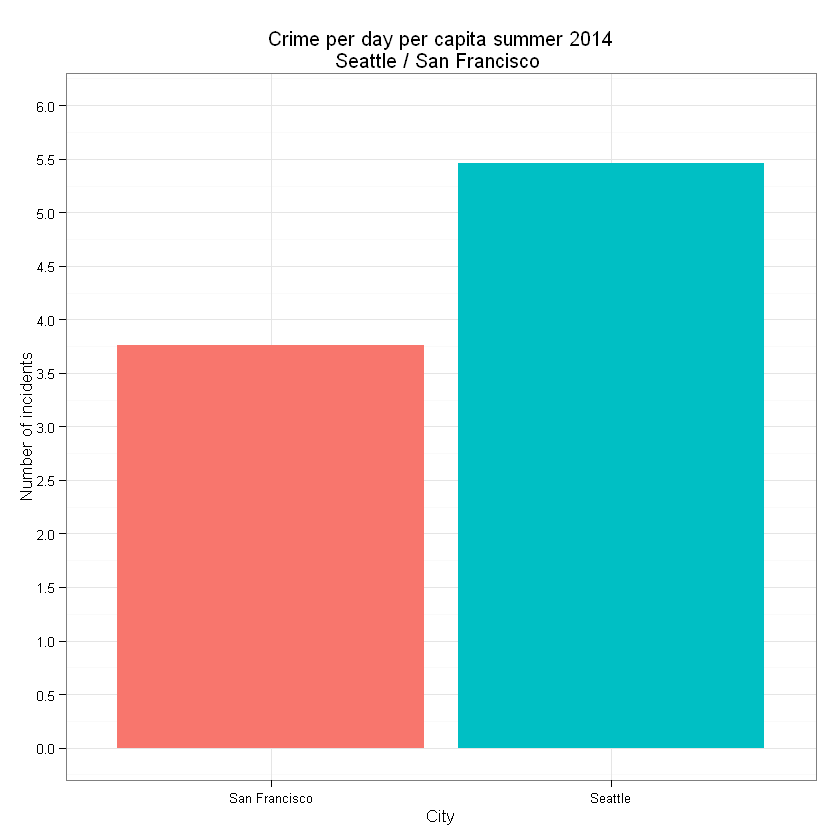

In [226]:
p1 <- ggplot(dfnincday, aes(x = city, 
                       y    = numincday*10000, 
                       fill = city, 
                       size = 5)) +
  geom_bar(stat="identity" ) +
  labs(title = "Crime per day per capita summer 2014\nSeattle / San Francisco ") +
  labs(y = "Number of incidents") +
  labs(x = "City") +
  theme_bw() +
  theme(legend.position = "none",
       text = element_text(size=10))+
  scale_y_continuous(limits=c(0, 6), breaks=seq(0,6, by=0.5)) 

 p1

Where is evident a lower frequence for San Francisco 